In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import funciones

In [2]:
df = pd.read_csv('df_10k_discretizado.csv')


In [5]:

X = df.drop('target_flavor', axis=1)
y = df['target_flavor']


# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

train_dist = y_train.value_counts()
train_dist_pct = y_train.value_counts(normalize=True) * 100

test_dist = y_test.value_counts()
test_dist_pct = y_test.value_counts(normalize=True) * 100


df_dist = pd.DataFrame({
    'Train Count': train_dist,
    'Train %': train_dist_pct,
    'Test Count': test_dist,
    'Test %': test_dist_pct
}).sort_index()

print("--- Distribución de Clases ---")
print(df_dist.round(2))

# Entrenamiento
# Usamos class_weight='balanced' por si tus clases están desbalanceadas (común en 190 variables)
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=7,            # <--- Evita que el árbol sea demasiado específico
    min_samples_leaf=10,    # <--- Exige que las hojas sean más generales
    max_features='sqrt',    # <--- Solo mira una parte de las 190 variables en cada nodo
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Probabilidades para el AUC

--- Distribución de Clases ---
               Train Count  Train %  Test Count  Test %
target_flavor                                          
0                     3755    50.07        1252   50.08
1                     3745    49.93        1248   49.92


           train  test
Exactitud   0.70  0.61
F1          0.69  0.60
APS         0.76  0.64
ROC AUC     0.78  0.66

Resumen de Métricas:


,train,test
Exactitud,0.70,0.61
F1,0.69,0.60
APS,0.76,0.64
ROC AUC,0.78,0.66


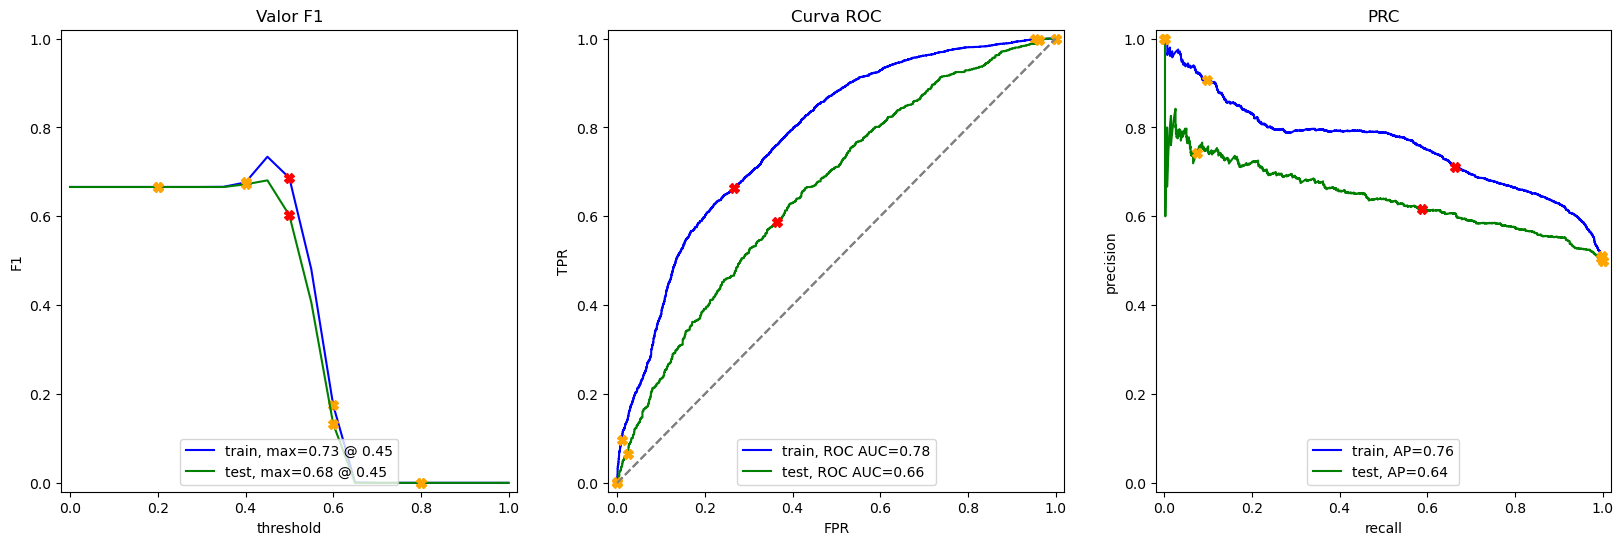

In [6]:
#evaluacion del modelo
stats, figura = funciones.evaluate_model(
    model=model, 
    train_features=X_train, 
    train_target=y_train, 
    test_features=X_test, 
    test_target=y_test
)

print("\nResumen de Métricas:")
display(stats)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(
    max_iter=1000, 
    class_weight='balanced', 
    penalty='l2', 
    C=1.0, 
    random_state=42
)

log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

           train  test
Exactitud   0.65  0.62
F1          0.64  0.62
APS         0.67  0.60
ROC AUC     0.69  0.63


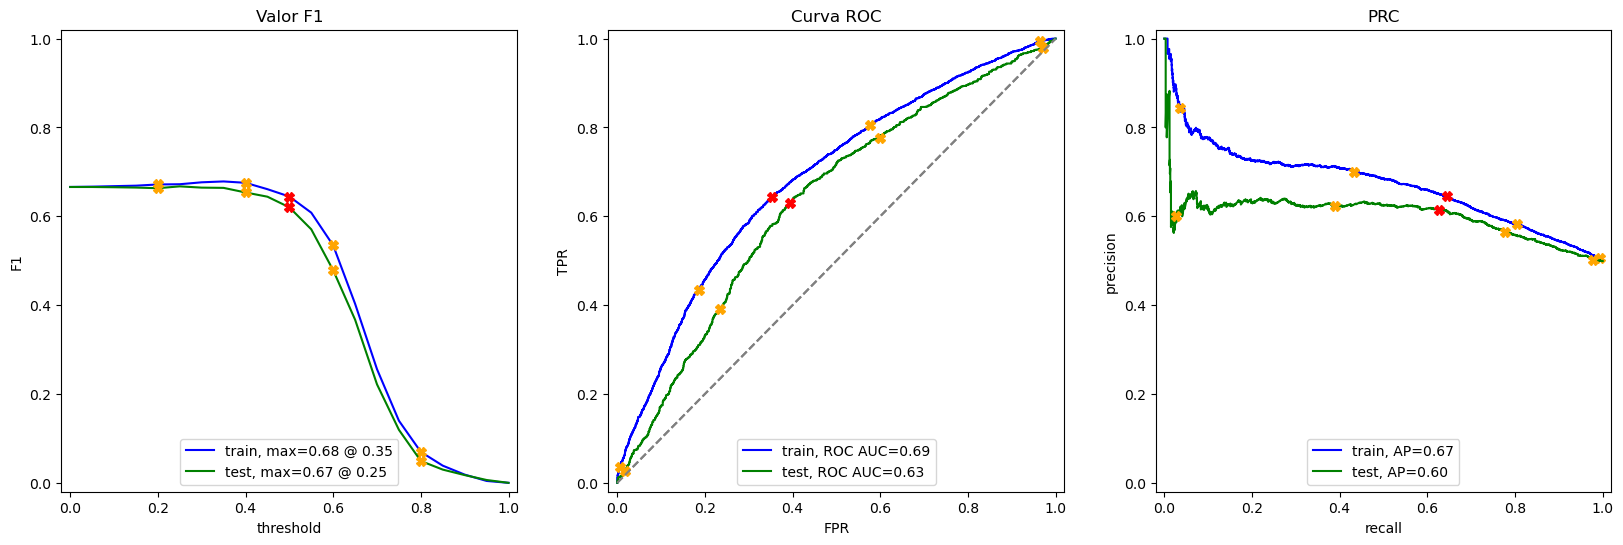

In [8]:
stats_lr, figura_lr = funciones.evaluate_model(
    model=log_reg, 
    train_features=X_train_scaled, 
    train_target=y_train, 
    test_features=X_test_scaled, 
    test_target=y_test
)